In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
# Деректерді интернеттен жүктеу
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

adult = pd.read_csv(url,
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

# Алғашқы 5 қатарды көрсету
adult.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Категориялық бағандар
categorical_cols = ['workclass', 'education', 'marital-status', 
                    'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

label_encoders = {}

# Барлық категориялық бағандарды кодтаймыз
for col in categorical_cols:
    le = LabelEncoder()
    adult[col] = le.fit_transform(adult[col].astype(str))
    label_encoders[col] = le

# Сандық бағандарды масштабтау (нормализация)
scaler = StandardScaler()
adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 
       'capital-loss', 'hours-per-week']] = scaler.fit_transform(adult[['age', 'fnlwgt', 'education-num', 
                                                                       'capital-gain', 'capital-loss', 'hours-per-week']])


In [5]:
# Белгілер мен мақсат
X = adult.drop('salary', axis=1).values
y = adult['salary'].values

# y-ді one-hot форматқа ауыстыру
y = to_categorical(y)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Conv1D және LSTM қабаттары үшін мәліметтердің өлшемін өзгерту
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [8]:
#Модельді құру
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\14ken\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,074 (105.76 KB)

 Trainable params: 27,074 (105.76 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Модельді оқыту
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7694 - loss: 0.5236 - val_accuracy: 0.8109 - val_loss: 0.3999
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8058 - loss: 0.4114 - val_accuracy: 0.8255 - val_loss: 0.3828
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8273 - loss: 0.3823 - val_accuracy: 0.8303 - val_loss: 0.3584
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8254 - loss: 0.3749 - val_accuracy: 0.8353 - val_loss: 0.3477
Epoch 5/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8276 - loss: 0.3696 - val_accuracy: 0.8370 - val_loss: 0.3425
Epoch 6/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8365 - loss: 0.3513 - val_accuracy: 0.8378 - val_loss: 0.3417
Epoch 7/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8336 - loss: 0.3489 - val_accuracy: 0.8370 - val_loss: 0.3403
Epoch 8/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8377 - loss: 0.3494 - val_acc

In [10]:
#Модельді тест деректерінде бағалау
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Тест дәлдігі: {accuracy:.4f}")


204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8400 - loss: 0.3397
Тест дәлдігі: 0.8397


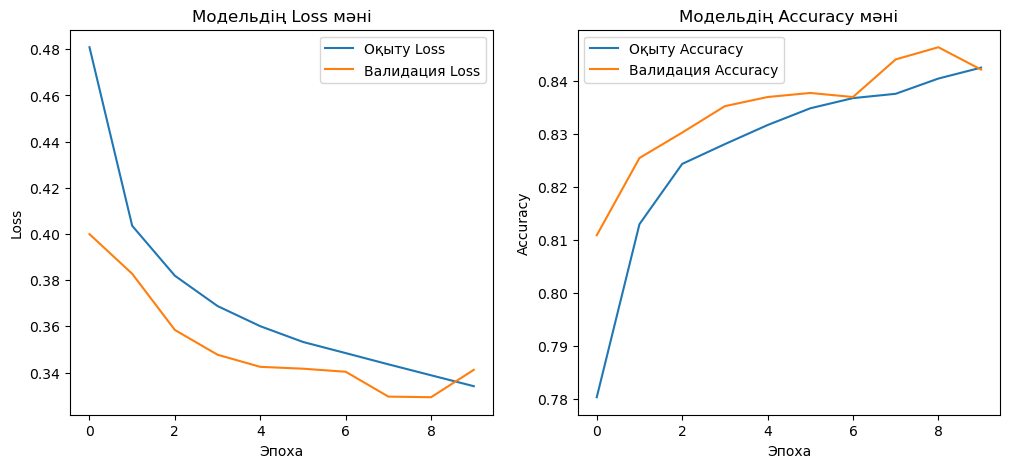

In [11]:
import matplotlib.pyplot as plt

# Loss графигі
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Оқыту Loss')
plt.plot(history.history['val_loss'], label='Валидация Loss')
plt.title('Модельдің Loss мәні')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()

# Accuracy графигі
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Оқыту Accuracy')
plt.plot(history.history['val_accuracy'], label='Валидация Accuracy')
plt.title('Модельдің Accuracy мәні')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Тест жиынтығындағы Loss: {loss:.4f}")
print(f"Тест жиынтығындағы Accuracy: {accuracy:.4f}")


204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8400 - loss: 0.3397
Тест жиынтығындағы Loss: 0.3407
Тест жиынтығындағы Accuracy: 0.8397


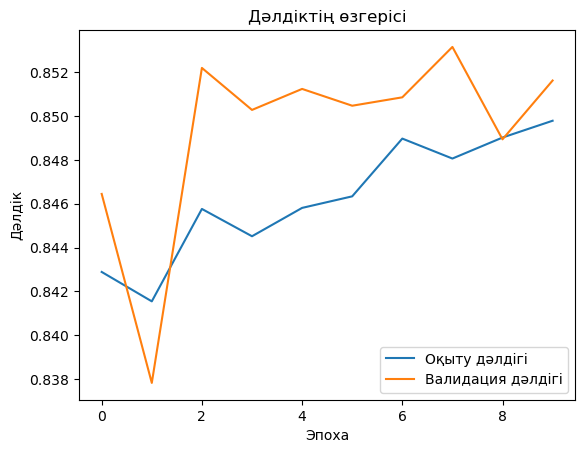

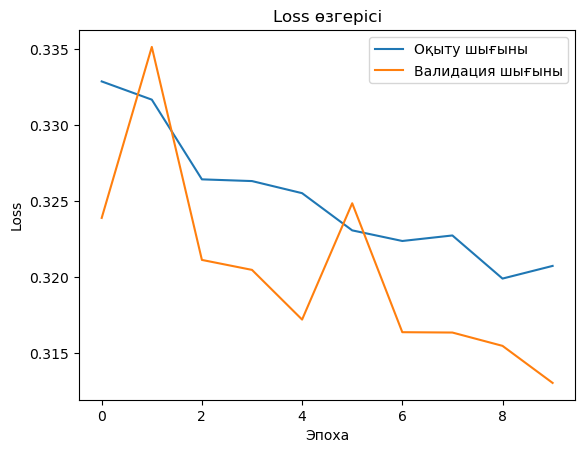

In [14]:
import matplotlib.pyplot as plt

# Точность (Accuracy) графигі
plt.plot(history.history['accuracy'], label='Оқыту дәлдігі')
plt.plot(history.history['val_accuracy'], label='Валидация дәлдігі')
plt.xlabel('Эпоха')
plt.ylabel('Дәлдік')
plt.legend()
plt.title('Дәлдіктің өзгерісі')
plt.show()

# Loss графигі
plt.plot(history.history['loss'], label='Оқыту шығыны')
plt.plot(history.history['val_loss'], label='Валидация шығыны')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss өзгерісі')
plt.show()
